### 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
# 1) 데이터 가져오기

from sklearn.datasets import load_diabetes

data = load_diabetes()

In [2]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [3]:
'''
age: 나이

sex: 성별

bmi: BMI(Body mass index)지수

bp: 평균혈압

s1~s6: 6종류의 혈액검사수치

'''

feature_names = data.feature_names

print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
import numpy as np
import pandas as pd


# EDA를 위해 판다스의 데이터 프레임 형태로 변환 

pd_data = pd.DataFrame(data.data, columns=feature_names)
pd_data['target'] = data.target

pd_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
# 컬럼별 타입, 결측치 확인


pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
# age, sex, bmi pb 값이 왜 음수가 있는지 ?
# 성별이 왜 범주형이 아니지?
# -> 이는 모든 특성이 -0.2 ~ 0.2 사이에 분포하도록 조정해서 그런것임.

pd_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [7]:
# target 특성과 상관계수를 확인하여 연관성이 높은 피처를 선택


pd_data.corr()['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [8]:
# 피쳐와 타겟 값 분리
# feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
df_X = pd_data[feature_names]

df_y = pd_data['target']

In [9]:
# 2) 모델에 입력할 데이터 X 준비하기 (np array 로 변환해서 저장)

df_X = np.array(df_X)

print(type(df_X))

<class 'numpy.ndarray'>


In [10]:
# 3) 모델에 예측할 데이터 y 준비하기

df_y = np.array(df_y)

print(type(df_y))

<class 'numpy.ndarray'>


In [11]:
# 4) train, test 데이터로 분리하기

from sklearn.model_selection import train_test_split

# train, test 비율 8:2

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2)

print(f' train data shpae = {X_train.shape}, {y_train.shape}')

print(f' test data shpae = {X_test.shape}, {y_test.shape}')

 train data shpae = (353, 10), (353,)
 test data shpae = (89, 10), (89,)


In [12]:
# 5) 모델 준비하기

W = np.random.rand(10)
b = np.random.rand(1)


def pred_model(X, W, b):
    return X.dot(W) + b

In [13]:
# 6) 손실함수 loss 정의하기 (MSE)

def mse_loss(y_pred, y):
    
    loss = ((y_pred - y) **2).mean()  
    return loss

In [14]:
# 7) 기울기를 구하는 gradient 함수 구현하기

def gradient(y_train, y_pred, X=X_train):
    
    dW = 1/len(X) * 2 * X.T.dot(y_pred - y_train)
    db = 2 * (y_pred - y_train).mean()
    
    return dW, db

In [15]:
# 8) 하이퍼 파라미터인 학습률 설정하기

learning_rate = 0.1

In [16]:
# 9) 모델 학습하기

loss_history = []

for i in range(5000):
    y_pred = pred_model(X_train, W, b)
    dW , db = gradient(y_train, y_pred)
    loss = mse_loss(y_pred, y_train)
    
    W -= learning_rate * dW
    b -= learning_rate * db
    
    loss_history.append(loss)
    
    if i % 10 == 0 :
        print(f'{i}epoch : Loss {loss:0.5f}')

0epoch : Loss 28880.84144
10epoch : Loss 6262.33585
20epoch : Loss 5925.98233
30epoch : Loss 5848.83727
40epoch : Loss 5776.93106
50epoch : Loss 5707.26150
60epoch : Loss 5639.72218
70epoch : Loss 5574.24252
80epoch : Loss 5510.75468
90epoch : Loss 5449.19310
100epoch : Loss 5389.49445
110epoch : Loss 5331.59754
120epoch : Loss 5275.44323
130epoch : Loss 5220.97437
140epoch : Loss 5168.13575
150epoch : Loss 5116.87401
160epoch : Loss 5067.13759
170epoch : Loss 5018.87667
180epoch : Loss 4972.04309
190epoch : Loss 4926.59033
200epoch : Loss 4882.47343
210epoch : Loss 4839.64893
220epoch : Loss 4798.07485
230epoch : Loss 4757.71060
240epoch : Loss 4718.51696
250epoch : Loss 4680.45604
260epoch : Loss 4643.49120
270epoch : Loss 4607.58706
280epoch : Loss 4572.70938
290epoch : Loss 4538.82511
300epoch : Loss 4505.90230
310epoch : Loss 4473.91004
320epoch : Loss 4442.81849
330epoch : Loss 4412.59880
340epoch : Loss 4383.22308
350epoch : Loss 4354.66436
360epoch : Loss 4326.89659
370epoch : 

3320epoch : Loss 3028.09174
3330epoch : Loss 3027.63680
3340epoch : Loss 3027.18589
3350epoch : Loss 3026.73900
3360epoch : Loss 3026.29606
3370epoch : Loss 3025.85706
3380epoch : Loss 3025.42195
3390epoch : Loss 3024.99070
3400epoch : Loss 3024.56326
3410epoch : Loss 3024.13961
3420epoch : Loss 3023.71970
3430epoch : Loss 3023.30351
3440epoch : Loss 3022.89100
3450epoch : Loss 3022.48213
3460epoch : Loss 3022.07687
3470epoch : Loss 3021.67519
3480epoch : Loss 3021.27704
3490epoch : Loss 3020.88241
3500epoch : Loss 3020.49125
3510epoch : Loss 3020.10354
3520epoch : Loss 3019.71924
3530epoch : Loss 3019.33832
3540epoch : Loss 3018.96074
3550epoch : Loss 3018.58649
3560epoch : Loss 3018.21552
3570epoch : Loss 3017.84781
3580epoch : Loss 3017.48332
3590epoch : Loss 3017.12202
3600epoch : Loss 3016.76390
3610epoch : Loss 3016.40891
3620epoch : Loss 3016.05702
3630epoch : Loss 3015.70822
3640epoch : Loss 3015.36246
3650epoch : Loss 3015.01973
3660epoch : Loss 3014.67999
3670epoch : Loss 301

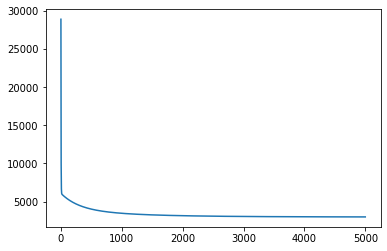

In [17]:
# Loss 그래프 확인 

import matplotlib.pyplot as plt

plt.plot(loss_history)

In [18]:
# 10)Test Data 성능확인해보기

pred = pred_model(X_test, W, b)

In [19]:
pred_loss = mse_loss(pred, y_test)

In [20]:
pred_loss

2595.4428478239447

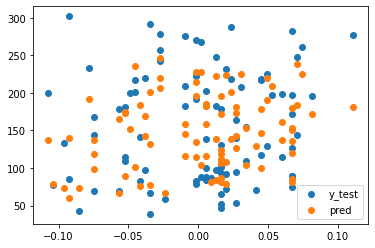

In [21]:
# 11) 정답 데이터와 예측한 데이터 시각화 하기

plt.scatter(X_test[:,0], y_test, label='y_test')
plt.scatter(X_test[:,0], pred, label='pred')
plt.legend()
plt.show()